## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [15]:
from arcgis.gis import GIS
gis = GIS("home")

#### Now you are ready to start!

In [72]:
import pandas as pd
from arcgis.mapping import WebMap, renderer
from arcgis.features import FeatureLayer
from arcgis.features import FeatureLayerCollection


<Item title:"World Cities" type:Feature Layer Collection owner:esri_dm>
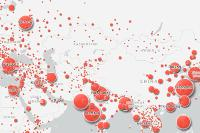

In [17]:



#basemap
#web_map_search =  gis.content.search("Charted Territory Map", item_type="Web Map" , outside_org=True)
#web_map_item = web_map_search[0]  

#countries of the world
#country_layer_search = gis.content.search("World Country Boundaries 2022", item_type="Feature Layer Collection" , outside_org=True)
#country_layer_search
#country_layer_item = country_layer_search[5]
country_layer_id =   "74572bf865fc4025978dea11507adc96" #"75ea506613f847e48ab0f91e93ac538d" #country_layer_item.id #2b93b06dc0dc4e809d3c8db5cb96ba69
country_layer_item = gis.content.get(country_layer_id)


#major cities of the world
majorCity_layer_search = gis.content.search('title: World Cities', 'Feature Layer', outside_org=True)

major_cities_item = majorCity_layer_search[4]
major_cities_item

In [14]:
#countries FeatureLayer
fl_countries_url = wm.layers[0].url #'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries_(Generalized)/FeatureServer/0'
fl_countries_orig = FeatureLayer(fl_countries_url)





fsCountries = fl_countries_orig.query()
fsCountries.features[0]

#countries_fset = fl_countries_orig.query()
#df_countries = countries_fset.sdf



#fl_countries.manager.update_definition({"drawingInfo": newRend})


{"geometry": {"rings": [[[-20037507.0671618, -19140939.8857634], [-20029839.2044695, -19145529.0593037], [-20019914.1847547, -19147722.1837524], [-20009926.4814513, -19148655.4915872], [-20001022.3700665, -19150532.6859222], [-19994187.246317, -19153036.3415941], [-19986458.5595212, -19156775.7490293], [-19974058.7977006, -19164898.5673058], [-19964903.3174745, -19175853.5062269], [-19952644.5983936, -19197991.248404], [-19944992.3859491, -19215467.8294258], [-19940382.3149884, -19220821.5305746], [-19934630.8764644, -19225252.1934413], [-19926715.3892156, -19228087.7559677], [-19917655.1007088, -19229980.3537976], [-19898297.8711057, -19230292.154088], [-19890260.0398239, -19232202.3811677], [-19882310.6075177, -19234720.0202016], [-19875417.7081235, -19238204.560414], [-19869635.6649299, -19242967.5128978], [-19859119.6391863, -19252776.7589071], [-19838000.8869095, -19272788.4538537], [-19814098.248041, -19299254.4541058], [-19810449.6489026, -19306611.3647537], [-19804497.7311311, 

In [52]:
fl_countries_orig.properties.drawingInfo.renderer = {
  "type": "simple",
  "symbol": {
    "color": [
      255,
      214,
      180,
      255
    ],
    "outline": {
      "color": [0, 255, 0, 0.5],
      "width": 0.75,
      "type": "esriSLS",
      "style": "esriSLSSolid"
    },
    "type": "esriSFS",
    "style": "esriSFSSolid"
  }
}

item_properties={"title": "Poverty Map", "snippet":"color_change save", "tags":"zero hunger"}
wm.update_layer(fl_countries_orig)
wm.save(item_properties=item_properties)


<Item title:"Poverty Map" type:Web Map owner:mrkencable>

In [11]:
mapA_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks"}

mapA_valueExpression = "var iso = 2;\
                        var retVal = 0;\
                        if (iso == 'USA' || iso == 'RUS') {\
                            retVal = 2;\
                        }\
                        return retVal;"

mapA_renderer["valueExpression"] = mapA_valueExpression

mapA_renderer["visualVariables"] = [    {   "type": "colorInfo",
                                            "valueExpression": mapA_valueExpression,
                                            "stops": [  {   "value": 0,
                                                            "color": [255,196,174,255],
                                                            "label": "unknown"
                                                        },
                                                        {   "value": 2,
                                                            "color": [249,129,108,255],
                                                            "label": "impoverished"
                                                        },  
                                                        {   "value": 3,
                                                            "color": [236,82,68,255],
                                                            "label": "at risk"
                                                        },
                                                        {   "value": 4,
                                                            "color": [194,61,51,255],
                                                            "label": "safe"
                                                        },
                                                        {   "value": 5,
                                                            "color": [123,66,56,255],
                                                            "label": "thriving"
                                                        }],
                                            "legendOptions": {
                                                "title": "Poverty Level"
                                            }
                                        }]





In [69]:
sdf = fl.query().sdf

<bound method NDFrame.describe of      OBJECTID FIPS_CNTRY ISO_2DIGIT ISO_3DIGIT         NAME  \
0           1         AF         AF        AFG  Afghanistan   
1           2         AL         AL        ALB      Albania   
2           3         AL         AL        ALB      Albania   
3           4         AL         AL        ALB      Albania   
4           5         AG         DZ        DZA      Algeria   
..        ...        ...        ...        ...          ...   
647       648         YM         YE        YEM        Yemen   
648       649         YM         YE        YEM        Yemen   
649       650         YM         YE        YEM        Yemen   
650       651         ZA         ZM        ZMB       Zambia   
651       652         ZI         ZW        ZWE     Zimbabwe   

                                   LONG_NAME   LOCSHRTNAM  \
0            Islamic Republic of Afghanistan  Afghanestan   
1                        Republic of Albania    Shqiperia   
2                        R

In [91]:
#sdf.describe
sdf["ISO_3DIGIT"][1]
genRen

{'type': 'uniqueValue',
 'defaultLabel': 'Other',
 'defaultSymbol': {'type': 'esriSFS',
  'style': 'esriSFSSolid',
  'color': [245, 40, 145, 5],
  'outline': {'style': 'esriSLSSolid',
   'type': 'esriSLS',
   'color': [128, 128, 128, 255],
   'width': 2}},
 'fieldDelimiter': ',',
 'rotationExpression': None,
 'rotationType': 'arithmetic',
 'valueExpression': None,
 'valueExpressionTitle': None,
 'visualVariables': [],
 'uniqueValueInfos': [{'value': 'USA',
   'color': [245, 40, 145, 225],
   'outline': {'color': [0, 255, 0, 0.5],
    'width': 0.01,
    'type': 'esriSLS',
    'style': 'esriSLSSolid'},
   'type': 'esriSFS',
   'style': 'esriSFSSolid'},
  {'value': 'RUS',
   'color': [75, 224, 39, 5],
   'outline': {'color': [0, 255, 0, 0.5],
    'width': 1,
    'type': 'esriSLS',
    'style': 'esriSLSSolid'},
   'type': 'esriSFS',
   'style': 'esriSFSSolid'},
  {'value': 'CAN',
   'color': [75, 224, 39, 0.5],
   'outline': {'color': [0, 255, 0, 0.5],
    'width': 1,
    'type': 'esriSLS'

In [97]:
wm =  WebMap(gis.content.get("774739a74dde48fe9ec978350e78a5af"))
fl = FeatureLayer(wm.layers[2].url)


gen_unique_values = [
        {
            "value" : "USA",
            "color": [245, 40, 145, 225],
            "outline": {
              "color": [0, 255, 0, 0.5],
              "width": 0.01,
              "type": "esriSLS",
              "style": "esriSLSSolid"
            },
            "type": "esriSFS",
            "style": "esriSFSSolid"
      },
        {
            "value" : "RUS",
            "color": [75, 224, 39, 5],
            "outline": {
              "color": [0, 255, 0, 0.5],
              "width": 1,
              "type": "esriSLS",
              "style": "esriSLSSolid"
            },
            "type": "esriSFS",
            "style": "esriSFSSolid"
      },
    
        {
            "value" : "CAN",
            "color": [75, 224, 39, 0.5],
            "outline": {
              "color": [0, 255, 0, 0.5],
              "width": 1,
              "type": "esriSLS",
              "style": "esriSLSSolid"
            },
            "type": "esriSFS",
            "style": "esriSFSSolid"
      }    
]

genRen = renderer.generate_renderer(
    "Polygon", 
    sdf, label="From genRen", render_type="u", colors=[[245, 40, 145, 5],[75, 224, 39, 5]], field1="ISO_3DIGIT", unique_values =gen_unique_values )



renderB =  {
  "type": "uniqueValue",
  "field1": "COUNTRY",
  "uniqueValueInfos": [
    {
      "value": "US",
      "symbol": {
        "color": [
          253,
          127,
          111,
          255
        ],
        "size": 12.75,
        "angle": 0,
        "xoffset": 0,
        "yoffset": 0,
        "type": "esriSMS",
        "style": "esriSMSCircle",
        "outline": {
          "color": [
            26,
            26,
            26,
            255
          ],
          "width": 0.75,
          "type": "esriSLS",
          "style": "esriSLSSolid"
        }
      },
      "label": "US"
    },
    {
      "value": "Canada",
      "symbol": {
        "color": [
          126,
          176,
          213,
          255
        ],
        "size": 12.75,
        "angle": 0,
        "xoffset": 0,
        "yoffset": 0,
        "type": "esriSMS",
        "style": "esriSMSCircle",
        "outline": {
          "colors": [
            26,
            26,
            26,
            255
          ],
          "width": 0.75,
          "type": "esriSLS",
          "style": "esriSLSSolid"
        }
      },
      "label": "Canada"
    },
    {
      "value": "Brazil",
      "symbol": {
        "colorz": [
          178,
          224,
          97,
          255
        ],
        "size": 12.75,
        "angle": 0,
        "xoffset": 0,
        "yoffset": 0,
        "type": "esriSMS",
        "style": "esriSMSCircle",
        "outline": {
          "color": [
            26,
            26,
            26,
            255
          ],
          "width": 0.75,
          "type": "esriSLS",
          "style": "esriSLSSolid"
        }
      },
      "label": "Brazil"
    },
    {
      "value": "Mexico",
      "symbol": {
        "color": [
          189,
          126,
          190,
          255
        ],
        "size": 12.75,
        "angle": 0,
        "xoffset": 0,
        "yoffset": 0,
        "type": "esriSMS",
        "style": "esriSMSCircle",
        "outline": {
          "color": [
            26,
            26,
            26,
            255
          ],
          "width": 0.75,
          "type": "esriSLS",
          "style": "esriSLSSolid"
        }
      },
      "label": "Mexico"
    }
  ]
}


wm.update_drawing_info(
    wm.layers[2],
    renderer = genRen,
    transparency = 40,
    show_labels = True,
)

item_properties={"title": "Poverty Map", "snippet":"city save", "tags":"zero hunger"}
wm.save(item_properties=item_properties)



#print(fl.properties)
#fs = fl.query()
#fs[0]




<Item title:"Poverty Map" type:Web Map owner:mrkencable>

In [18]:


#wm.add_layer(country_layer_item)
wm.add_layer(country_layer_item,
               { "type": "FeatureLayer",
                 "renderer": mapA_renderer})

wm.add_layer(major_cities_item)



item_properties={"title": "Poverty Map", "snippet":"city save", "tags":"zero hunger"}
wm.save(item_properties=item_properties)


<Item title:"Poverty Map" type:Web Map owner:mrkencable>

In [60]:
for layer in wm.layers:
    print(layer)
    

{
  "title": "World_Countries_Generalized",
  "opacity": 1,
  "visibility": true,
  "id": "dff80c54-28d4-4578-8ece-7ad9df72e8f1",
  "layerDefinition": {
    "definitionExpression": null,
    "drawingInfo": {
      "renderer": {
        "type": "simple",
        "symbol": {
          "color": [
            255,
            214,
            180,
            255
          ],
          "outline": {
            "color": [
              251,
              164,
              93,
              255
            ],
            "width": 0.75,
            "type": "esriSLS",
            "style": "esriSLSSolid"
          },
          "type": "esriSFS",
          "style": "esriSFSSolid"
        }
      }
    }
  },
  "layerType": "ArcGISFeatureLayer",
  "itemId": "2b93b06dc0dc4e809d3c8db5cb96ba69",
  "url": "https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries_(Generalized)/FeatureServer/0",
  "popupInfo": {
    "title": "World_Countries_Generalized",
    "fieldInfos": [
 